<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [60]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Load the dataset into a dataframe.


In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


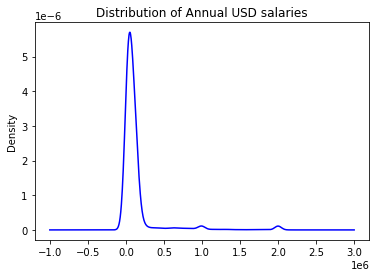

In [24]:
# your code goes here
#Remove duplicates
df = df.drop_duplicates()
#Imputing missing values by mean
df["ConvertedComp"].fillna(df["ConvertedComp"].mean(), inplace=True)

df.ConvertedComp.plot.density(color='blue')
plt.title('Distribution of Annual USD salaries') 
plt.show()



Plot the histogram for the column `ConvertedComp`.


[10475   238   115   125    99   131    34    15    15   151]
[      0.  200000.  400000.  600000.  800000. 1000000. 1200000. 1400000.
 1600000. 1800000. 2000000.]


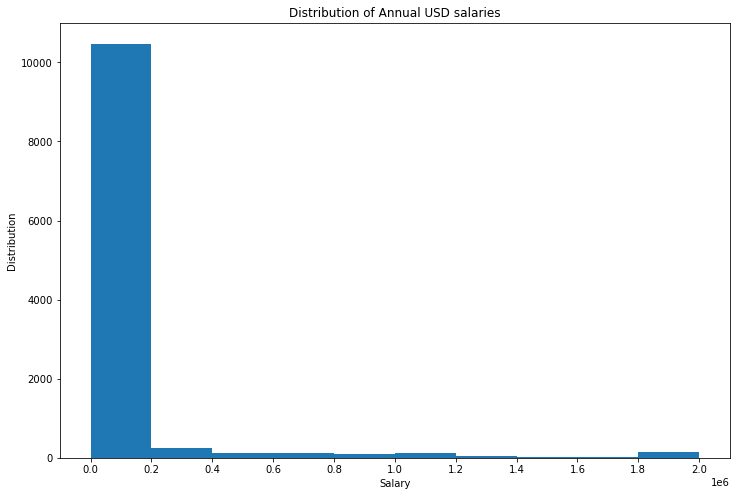

In [54]:
# your code goes here

count, bin_edges = np.histogram(df['ConvertedComp'])
print(count)
print(bin_edges)

df['ConvertedComp'].plot(kind='hist', figsize=(12, 8), xticks=bin_edges)
plt.title("Distribution of Annual USD salaries")
plt.xlabel("Salary")
plt.ylabel("Distribution")

plt.show()

What is the median of the column `ConvertedComp`?


In [34]:
# your code goes here
df["ConvertedComp"].median()

63016.0

How many responders identified themselves only as a **Man**?


In [40]:
# your code goes here
dfm = df.loc[df["Gender"] == "Man"]
dfm["Gender"].count()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [42]:
# your code goes here
dfw= df.loc[df["Gender"] == "Woman"]
dfw["ConvertedComp"].median()

61071.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [49]:
# your code goes here


min = df["Age"].min()
max = df["Age"].max()
median = df["Age"].median()
q1 = df['Age'].quantile(q=0.25)
q3 = df['Age'].quantile(q=0.75)

fns = min, q1, median, q3, max
print("five-number summary is " + str(fns))


five-number summary is (16.0, 25.0, 29.0, 35.0, 99.0)


Plot a histogram of the column `Age`.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f537f7878d0>]],
      dtype=object)

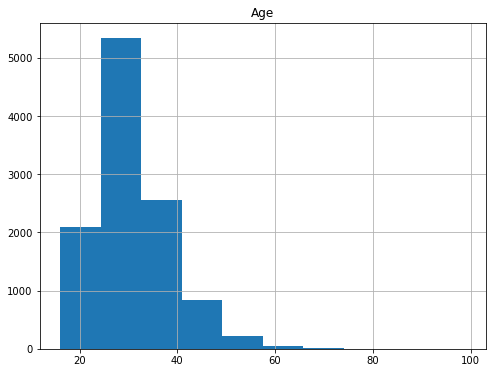

In [59]:
# your code goes here
df.hist(column='Age', figsize=(8,6))

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


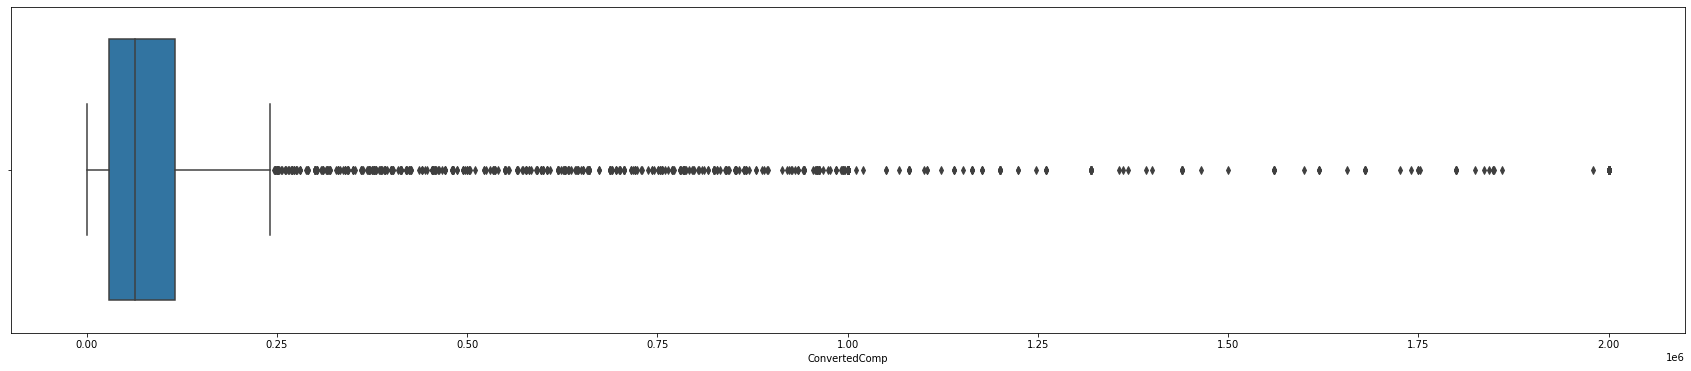

In [65]:
# your code goes here
plt.figure(figsize=(30, 6))
sns.boxplot(x=df["ConvertedComp"])
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [68]:
# your code goes here
q1 = df['ConvertedComp'].quantile(q=0.25)
q3 = df['ConvertedComp'].quantile(q=0.75)
IQR = q3 - q1
print("Interquartile range is " + str(IQR))

Interquartile range is 86448.0


Find out the upper and lower bounds.


In [82]:
# your code goes here

upper_bounds = df.loc[1, "ConvertedComp"]
lower_bounds = df.loc[11397, "ConvertedComp"]
print(upper_bounds)
print(lower_bounds)

95179.0
131596.7316197316


Identify how many outliers are there in the `ConvertedComp` column.


In [71]:
# your code goes here

outliers = (df["ConvertedComp"]<(q1-1.5*IQR)) | (df["ConvertedComp"]>(q3+1.5*IQR))
outliers.value_counts()

False    10587
True       811
Name: ConvertedComp, dtype: int64

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [96]:
# your code goes here

df_remove = df[~((df["ConvertedComp"] < (q1-1.5*IQR)) | (df["ConvertedComp"] > (q3+1.5*IQR)))]
df_remove.ConvertedComp.count()
df_remove.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [97]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002101,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002101,0.001037,1.000000,0.020694,-0.031220,0.101676
WorkWeekHrs,-0.015314,0.003510,0.020694,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.031220,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.101676,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
